# Predicting heart disease using machine learning

This notebook looks into using various Python-Based machine learning and data science libaries in an attempt to build  machine learning model capable of predicting wether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data 
3. Evaluation 
4. Features
5. Modelling
6. Experimentation 

## 1. Problem definition

In a statement,
> Given clinical paraemters about a patient can we predict wether or not they have heart disease?

## 2. Data 
The original data came from Cleaveland data from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version of it available on Kaggle.
https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci/

## 3. Evaluation 

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease duting the proof of concept, we will persue the project.

## 4. Features

**Data dictionary**

1. age
2. sex (male : 1, female : 0)

3. chest pain type(cp)
   - Value 1: typical angina
   - Value 2: atypical angina
   - Value 3: non-anginal pain
   - Value 4: asymptomatic

4. resting blood pressure (in mm Hg on admission to the hospital)

5. cholserum cholestoral in mg/dl

6. fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7. resting electrocardiographic results
   - Value 0: normal
   - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8. thalach: maximum heart rate achieved

9. exercise induced angina (1 = yes; 0 = no)

Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood.
It may feel like pressure or squeezing in your chest.

10. oldpeak = ST depression induced by exercise relative to rest

11. slope: the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping

12. vessels colored by flourosopy : number of major vessels (0-3) colored by flourosopy

13. A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14. Target : 0 No Heart disease, 1 Heart disease

## Preparing the tools
Using pandas, Matplotlib and NumPy for data analysis and manipulation.

In [1]:
# import all required tools 

# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# All plots appear inside the noteboook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation 
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve

## Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data Exploration (Exploratory Data Analysis or EDA)

Finding more about the data, enough to become an "expert" on the subject matter

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What is missing from the data and how do you deal with it?
4. Where are the outliers and why are they important?
6. How can I add, change or remove features to get more out of the data?


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Find out how many of each class there are
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

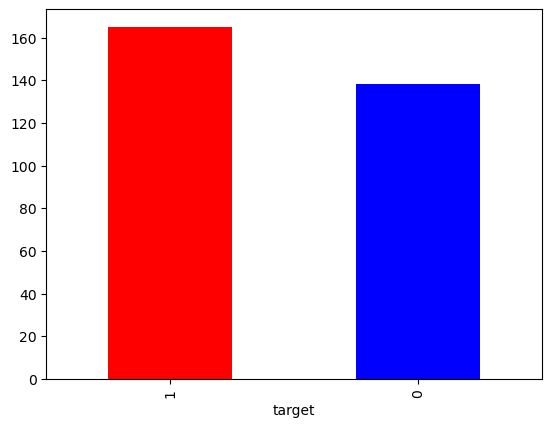

In [6]:
df["target"].value_counts().plot(kind="bar", color=["red", "blue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
# Compare target column with the sex column.
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


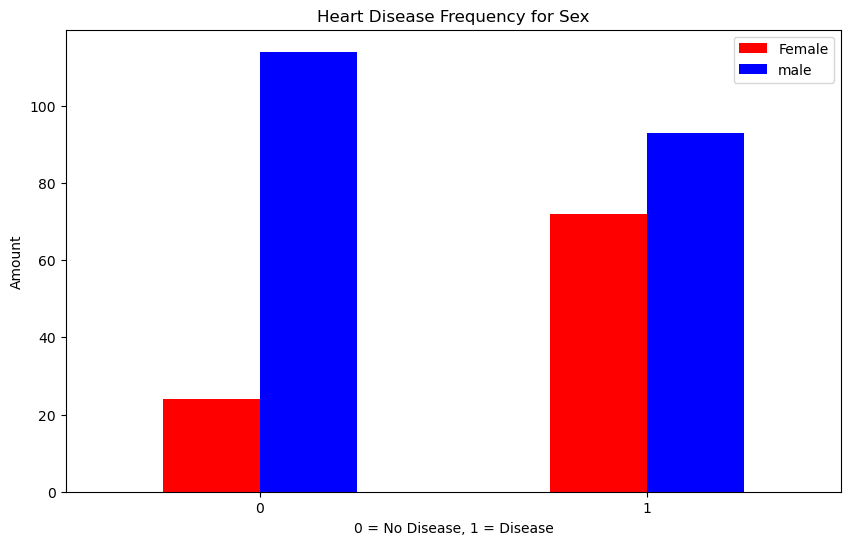

In [12]:
# Creating a plot of the crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", 
                                    figsize=(10, 6), 
                                    color=["red", "blue"], 
                                    title="Heart Disease Frequency for Sex", 
                                    xlabel="0 = No Disease, 1 = Disease", 
                                    ylabel="Amount");
plt.legend(["Female", "male"]);
plt.xticks(rotation=0);

## Age vs Max Heart Rate for Disease

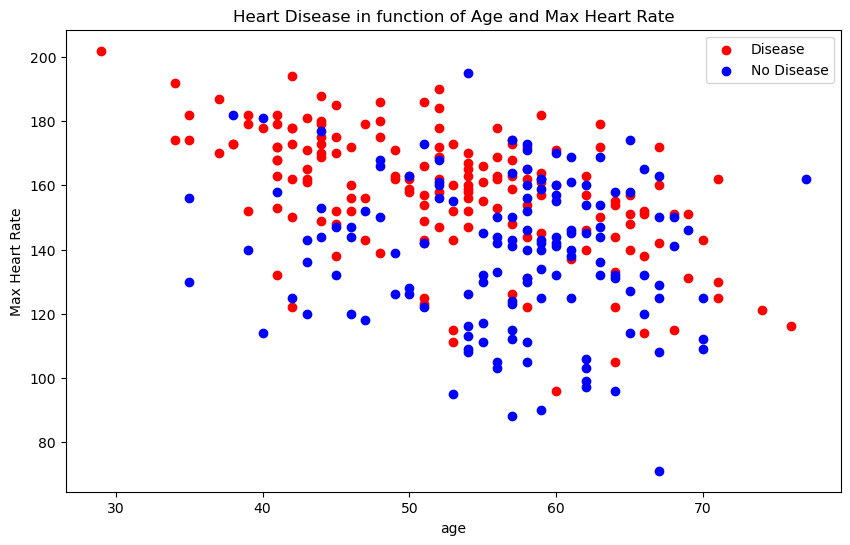

In [17]:
# Create figure 
plt.figure(figsize=(10, 6))

# Scatter with positive examples 
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c ="red");

# Scatter with negative examples
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c = "blue");

# Add some helpful information 
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

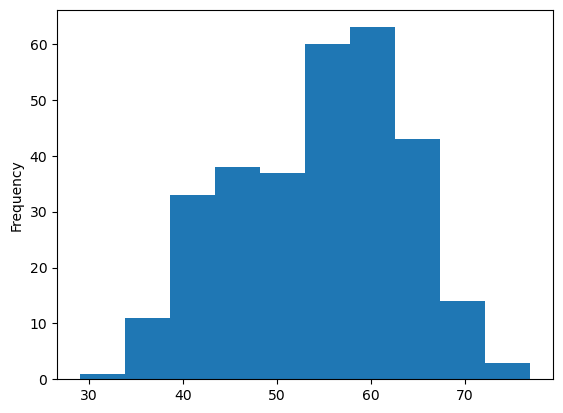

In [19]:
# Check the distribution of the age column with a histogram 
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type

3. chest pain type(cp)
   - Value 1: typical angina
   - Value 2: atypical angina
   - Value 3: non-anginal pain
   - Value 4: asymptomatic


In [20]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


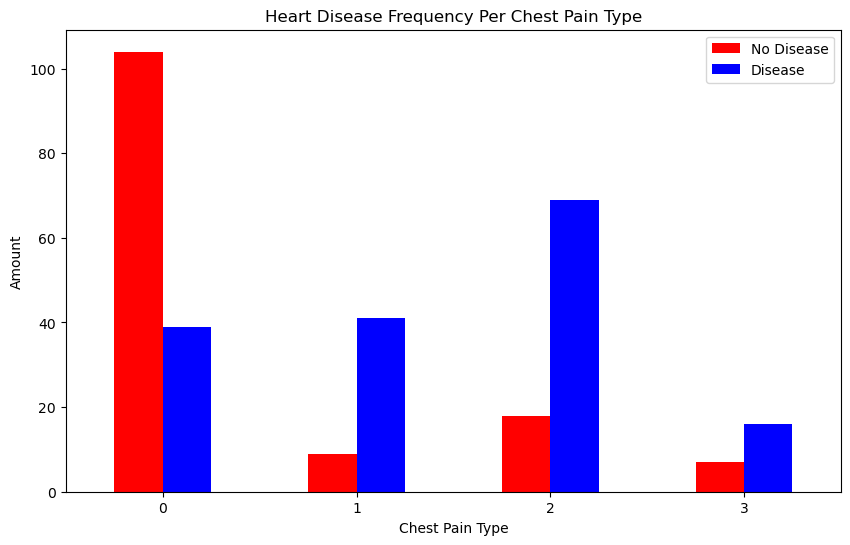

In [23]:
 # Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   figsize=(10, 6), 
                                   color=["red", "blue"])

# Adding details to plot 
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

testing commit